S2 méthode numérique
===
Test
---




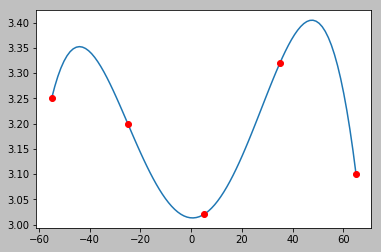

In [10]:
from numpy import *
import matplotlib 
from matplotlib import pyplot as plt

matplotlib.rcParams['toolbar'] = 'None'
plt.rcParams['figure.facecolor'] = 'silver'
plt.figure("Polynomial interpolation")
 
X = [ -55, -25,   5,  35,  65]
U = [3.25,3.20,3.02,3.32,3.10]
a = polyfit(X,U,4)
 
x = linspace(X[0],X[-1],100)
uh = polyval(a,x)
 
plt.plot(x,uh)
plt.plot(X,U,'or')
plt.show()

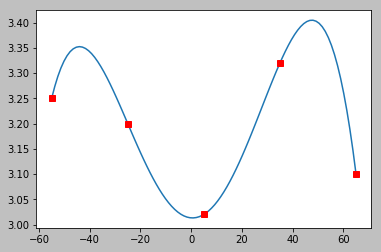

In [19]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

X = [ -55, -25,   5,  35,  65]
U = [3.25,3.20,3.02,3.32,3.10]
a = np.polyfit(X, U, 4)

#Create a 100 value array between -55 and 65
x = np.linspace(X[0], X[-1], 100)
uh = np.polyval(a, x)


plt.plot(x, uh)
plt.plot(X,U, 'rs' )

Problème 1
---

In [2]:
%%writefile test.py

import numpy as np 
import matplotlib
from matplotlib import pyplot as plt

def interpolation(X, U, x):
    """
    Process an interpolation fitting the points (X, U).
    Return the interpollated image of x
    """
    k = np.arange(-(len(X)-1)/2, (len(X)-1)/2 + 1)      #Create an array from -n to n
    fun_matrix = np.array([[np.exp(np.complex(0,i * x_val)) for i in k] for x_val in X ])       #Create the base function matrix
    coef_vector = np.linalg.solve(fun_matrix, U)        #Solve the system to find the coefficient
    matrix_to_fit = np.array([[np.exp(np.complex(0,i * x_val)) for i in k] for x_val in x ])        #base function matrix evaluated at the points we want to fit
    interpol_val = matrix_to_fit @ coef_vector      #Matrix product to get the interpolated points
    interpol_val = interpol_val.real        #Extract the real part of the complex numbers
    return interpol_val

from matplotlib import pyplot as plt
from numpy import *
n = 4
m = 100
x = (2*pi/(m))*arange(0,m+1)
X = (2*pi/(2*n+1))*arange(0,2*n+1)

functions = [lambda x : x*(x-2*pi)*exp(-x),
            lambda x : sin(x)+sin(5*x),
            lambda x : sign(x-2)]

for u in functions:
    plt.figure()
    plt.plot(x,u(x),'-b',label='Fontion u')
    U = u(X)
    uh = polyval(polyfit(X,U,len(X)-1),x)
    plt.plot(x,uh,'-g',label='Interpolation polynomiale')
    uh = interpolation(X,U,x)
    plt.plot(x,uh,'-r',label='Interpolation trigonometrique')
    plt.plot(X,U,'ob')
    plt.xlim((-0.2,2*pi+0.2)); plt.ylim((-3,3))
    plt.title('Interpolation trigonometrique : 2n+1 = %d ' % len(X))
    plt.legend(loc='upper right')

plt.show()




Overwriting test.py


Exercices
---


### Exercices 3 Séance 1

[-4 -3 -2 -1  0  1  2  3  4]
3.0625000000000027


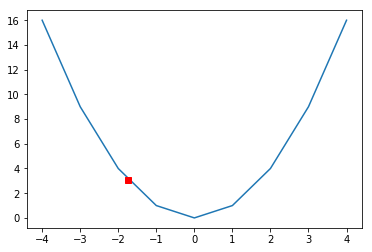

In [38]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
n = 4
k_arr = np.arange(-n, n+1)
U = k_arr**2

print(k_arr)



def interpol_3(t, n, U_k):
    k_arr = np.arange(-n, n+1)
    smallest = 100
    pos_smal = None
    for pos,i in enumerate(k_arr):
        if abs(t-i) <= smallest:
            smallest = abs(t-i)
            pos_smal = pos
    inter_pos_arr = k_arr[pos_smal-1:pos_smal+3]
    U_k_arr_small = U_k[pos_smal-1:pos_smal+3]
    
    a = np.polyfit(inter_pos_arr, U_k_arr_small, 3)
    uh = np.polyval(a, t)
    
    plt.plot(k_arr, U_k)
    #plt.plot(k_arr, np.polyval(a, k_arr))
    plt.plot(t, uh, "rs")
    return uh

print(interpol_3(-1.75,4, U))



### Solution du prof

In [37]:
from numpy import *

def compute(n,U,t):
#
# -1- Calcul du noeud qui precede Xestim
# Gestion des cas critiques (extrapolation `a droite et `a gauche)
#
    k = int(floor(t))
    k = n-2 if (k+2 > n) else k
    k = -n+1 if (k-1 < -n) else k
#
# -2- Estimation avec des polynomes de Lagrange
# xi = coordonnee locale avec Xlocal = [-1 0 1 2]
#
    Ulocal = U[n+k-1:n+k+3]
    xi = t - k
    phi = array([ -xi*(xi-1)*(xi-2) ,3*(xi+1)*(xi-1)*(xi-2),
    -3*(xi+1)*xi*(xi-2),(xi+1)*xi*(xi-1)]) / 6;
    
    return Ulocal @ phi



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()